In [2]:
from keras.datasets import fashion_mnist
(train_X,train_Y),(test_X,test_Y)=fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


In [3]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training Data Shape: ',train_X.shape,train_Y.shape)
print('Testing Data Shape: ',test_X.shape,test_Y.shape)

Training Data Shape:  (60000, 28, 28) (60000,)
Testing Data Shape:  (10000, 28, 28) (10000,)


In [4]:
#Unique numbers from train labels
classes=np.unique(train_Y)
nClasses=len(classes)
print('Total Outputs:',nClasses)
print('Output Classes:',classes)

Total Outputs: 10
Output Classes: [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth: 9')

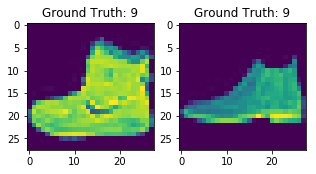

In [5]:
plt.figure(figsize=[5,5])
#first img in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:])
plt.title('Ground Truth: {}'.format(train_Y[0]))

#first img in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:])
plt.title('Ground Truth: {}'.format(test_Y[0]))

In [6]:
#Data Preprocessing

#INPUT: [28x28x1]
train_X=np.asarray(train_X)
test_X=np.asarray(test_X)
train_Y=np.asarray(train_Y)
test_Y=np.asarray(test_Y)

train_X=train_X.reshape(-1,28,28,1)
test_X=test_X.reshape(-1,28,28,1)
print('X Shapes:',train_X.shape,test_X.shape)

#int8 -> float32
train_X=train_X.astype('float32')
test_X=test_X.astype('float32')
train_X=train_X/255
test_X=test_X/255

#One-Hot Encoding Vectors
train_Y_one_hot=to_categorical(train_Y)
test_Y_one_hot=to_categorical(test_Y)

print('Original label: ',train_Y[0])
print('After one-hot encoding: ',train_Y_one_hot[0])
print('Encoding vector shape: ',train_Y_one_hot.shape)

X Shapes: (60000, 28, 28, 1) (10000, 28, 28, 1)
Original label:  9
After one-hot encoding:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Encoding vector shape:  (60000, 10)


In [0]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)


In [8]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [9]:
'''
ConvNet Architecture

INPUT [28X28X1]
CONV3-32
MAX_POOL2
CONV3-64
MAX_POOL2
CONV3-128
MAX_POOL2
FLATTEN
DENSE (FC)
OUTPUT [10]
'''

import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

batch_size=64 #TODO: Test with 128,256
epochs=20
num_classes=10

fashion_model=Sequential()
fashion_model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2),padding='same'))
fashion_model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
fashion_model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128,activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes,activation='softmax'))

W0802 06:35:56.343173 139691651286912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0802 06:35:56.389797 139691651286912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 06:35:56.399822 139691651286912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0802 06:35:56.447772 139691651286912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [10]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

W0802 06:36:00.702302 139691651286912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0802 06:36:00.715368 139691651286912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [13]:
fashion_train=fashion_model.fit(train_X,train_label,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X,valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 86s 2ms/step - loss: 0.2886 - acc: 0.8955 - val_loss: 0.2851 - val_acc: 0.8950
Epoch 2/20
48000/48000 [==============================] - 86s 2ms/step - loss: 0.2390 - acc: 0.9123 - val_loss: 0.2630 - val_acc: 0.9055
Epoch 3/20
48000/48000 [==============================] - 85s 2ms/step - loss: 0.2092 - acc: 0.9233 - val_loss: 0.2409 - val_acc: 0.9117
Epoch 4/20
48000/48000 [==============================] - 87s 2ms/step - loss: 0.1810 - acc: 0.9316 - val_loss: 0.2423 - val_acc: 0.9128
Epoch 5/20
48000/48000 [==============================] - 87s 2ms/step - loss: 0.1604 - acc: 0.9398 - val_loss: 0.2359 - val_acc: 0.9177
Epoch 6/20
48000/48000 [==============================] - 87s 2ms/step - loss: 0.1358 - acc: 0.9497 - val_loss: 0.2286 - val_acc: 0.9212
Epoch 7/20
48000/48000 [==============================] - 88s 2ms/step - loss: 0.1165 - acc: 0.9559 - val_loss: 0.2345 - val_acc

In [14]:
#Model Evaluation in Test Set
test_eval=fashion_model.evaluate(test_X,test_Y_one_hot,verbose=0)
print('Test Loss: ',test_eval[0])
print('Test Accuracy: ',test_eval[1])

Test Loss:  0.485125187512557
Test Accuracy:  0.9107


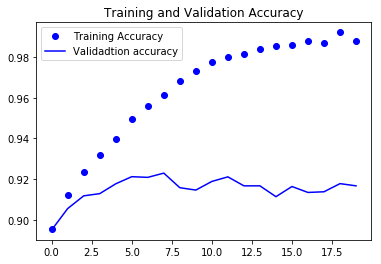

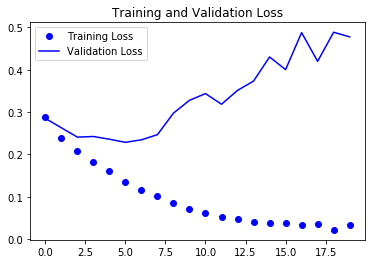

In [15]:
accuracy=fashion_train.history['acc']
val_accuracy=fashion_train.history['val_acc']
loss=fashion_train.history['loss']
val_loss=fashion_train.history['val_loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validadtion accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [16]:
#from the graphs above we can see that the model is probably overfitting (as val_accuracy remains constant after few epochs)
#Adding Dropout to reduce overfitting

'''
New ConvNet Architecture
INPUT
CONV2D-32
MAX_POOL2D
##DROPOUT
CONV2D-64
MAX_POOL2D
##DROPOUT
CONV2D-128
MAX_POOL2D
##DROPOUT
FLATTEN
DENSE
DROPOUT
DENSE-SOFTMAX
'''

batch_size=64
epochs=20
num_classes=10

fashion_model=Sequential()
fashion_model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128,activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes,activation='softmax'))

W0802 07:13:16.714603 139691651286912 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [0]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [19]:
fashion_train_dropout=fashion_model.fit(train_X,train_label,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X,valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 100s 2ms/step - loss: 0.5916 - acc: 0.7789 - val_loss: 0.3694 - val_acc: 0.8682
Epoch 2/20
48000/48000 [==============================] - 100s 2ms/step - loss: 0.3681 - acc: 0.8657 - val_loss: 0.2978 - val_acc: 0.8912
Epoch 3/20
48000/48000 [==============================] - 100s 2ms/step - loss: 0.3232 - acc: 0.8812 - val_loss: 0.2700 - val_acc: 0.8998
Epoch 4/20
48000/48000 [==============================] - 101s 2ms/step - loss: 0.2955 - acc: 0.8923 - val_loss: 0.2553 - val_acc: 0.9063
Epoch 5/20
48000/48000 [==============================] - 101s 2ms/step - loss: 0.2783 - acc: 0.8967 - val_loss: 0.2430 - val_acc: 0.9121
Epoch 6/20
48000/48000 [==============================] - 101s 2ms/step - loss: 0.2657 - acc: 0.9016 - val_loss: 0.2380 - val_acc: 0.9123
Epoch 7/20
48000/48000 [==============================] - 100s 2ms/step - loss: 0.2512 - acc: 0.9064 - val_loss: 0.2345 - 

In [0]:
fashion_model.save('fashion_model_fropout.h5py')

In [21]:
test_eval=fashion_model.evaluate(test_X,test_Y_one_hot,verbose=1)

10000/10000 [==============================] - 6s 552us/step


In [22]:
print('Test Loss: ',test_eval[0])
print('Test Accuracy: ',test_eval[1])

Test Loss:  0.21615435140132905
Test Accuracy:  0.9215


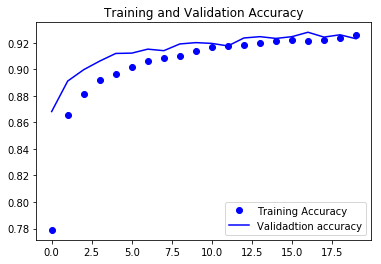

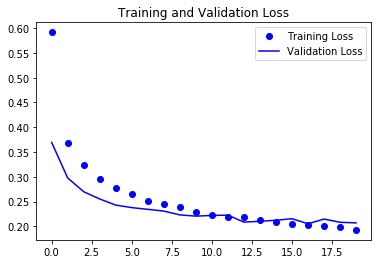

In [23]:
accuracy=fashion_train_dropout.history['acc']
val_accuracy=fashion_train_dropout.history['val_acc']
loss=fashion_train_dropout.history['loss']
val_loss=fashion_train_dropout.history['val_loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validadtion accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [25]:
#Dropout worked. val_accuracy and training accuracy follow similar curves
#Predicting Labels

predicted_classes=fashion_model.predict(test_X)
predicted_classes=np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape,test_Y.shape

((10000,), (10000,))

Found 9172 correct labels


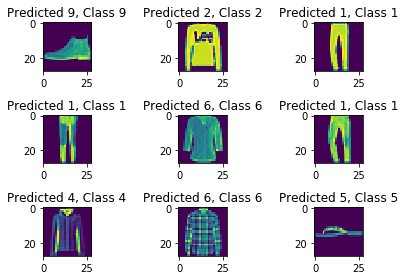

In [26]:
correct=np.where(predicted_classes==test_Y)[0]
print('Found %d correct labels' %len(correct))
for i,correct in enumerate(correct[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(test_X[correct].reshape(28,28),interpolation='none')
  plt.title('Predicted {}, Class {}'.format(predicted_classes[correct],test_Y[correct]))
  plt.tight_layout()

Found 828 incorrect labels


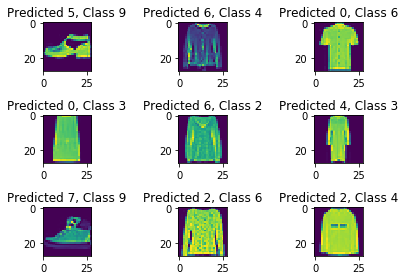

In [28]:
incorrect=np.where(predicted_classes!=test_Y)[0]
print('Found %d incorrect labels' %len(incorrect))
for i,incorrect in enumerate(incorrect[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(test_X[incorrect].reshape(28,28),interpolation='none')
  plt.title('Predicted {}, Class {}'.format(predicted_classes[incorrect],test_Y[incorrect]))
  plt.tight_layout()

In [29]:
#Classification Metrics
from sklearn.metrics import classification_report

target_names=['Class {}'.format(i) for i in range(num_classes)]
print(classification_report(test_Y,predicted_classes,target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.77      0.92      0.83      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.86      0.89      0.87      1000
     Class 3       0.94      0.90      0.92      1000
     Class 4       0.87      0.88      0.88      1000
     Class 5       0.99      0.99      0.99      1000
     Class 6       0.85      0.68      0.76      1000
     Class 7       0.95      0.98      0.97      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.99      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

